## **1. Types of recommendation systems:**
### **1.1. Content based**
**If a set of users like two particular things, and another (new) user likes one of those two things, then he/she probably likes the other thing as well. (Users are not compared)**
### **1.2. Collaborative filtering**
**If one user likes three things and another user likes two of those three things, he/she is recommended the thrid thing. (Similar users are recommended similar things)**
#### **1.2.1 Model based**
#### **1.2.1 Memory based**

In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
# Ignore any warnings that are raised
warnings.filterwarnings('ignore')

In [3]:
# Reading u.data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep = '\t', names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
# Find number of unique users and movies
print("There are", df['user_id'].nunique(), "unique users")
print("There are", df['item_id'].nunique(), "unique movies")

There are 943 unique users
There are 1682 unique movies


In [6]:
# Reding u.item
movies_title = pd.read_csv('ml-100k/u.item', sep = '\|', header = None)
movies_title.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
movies_title.shape

(1682, 24)

In [8]:
# We are interested only in the movie name (2nd column)
movies_title = movies_title[[0, 1]]
movies_title.columns = ['item_id', 'title']
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
# Merge the two dataframes based on item_id (common column)
df = pd.merge(df, movies_title, on = 'item_id')
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


### **Exploratory data analysis**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [11]:
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [20]:
# Taking the mean of user_id, timestamp and item_id does not make sense
# We only thus consider the mean of rating
df.groupby('title').mean()['rating'].sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

**Usually movies do not attain 5 star ratings. The above table must indicate that very few people have watched and reviewed the movies with 5 star ratings.**

In [24]:
# Trying to find number of ratings each movie has received
df.groupby('title').count()['rating'].sort_values()

title
� k�ldum klaka (Cold Fever) (1994)              1
Mille bolle blu (1993)                          1
Mat' i syn (1997)                               1
Marlene Dietrich: Shadow and Light (1996)       1
Man from Down Under, The (1943)                 1
                                             ... 
Liar Liar (1997)                              485
Return of the Jedi (1983)                     507
Fargo (1996)                                  508
Contact (1997)                                509
Star Wars (1977)                              583
Name: rating, Length: 1664, dtype: int64

In [30]:
# Creating a dataframe of the mean-ratings table and the number of ratings
ratings = pd.DataFrame(df.groupby('title').mean()['rating'].sort_values(ascending = False))
# Adding a column for total ratings per movie
ratings['number of ratings'] = df.groupby('title').count()['rating']
ratings.sort_values(by = 'rating', ascending = False)

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"I, Worst of All (Yo, la peor de todas) (1990)",1.0,1
"Woman in Question, The (1950)",1.0,1
Vermont Is For Lovers (1992),1.0,1


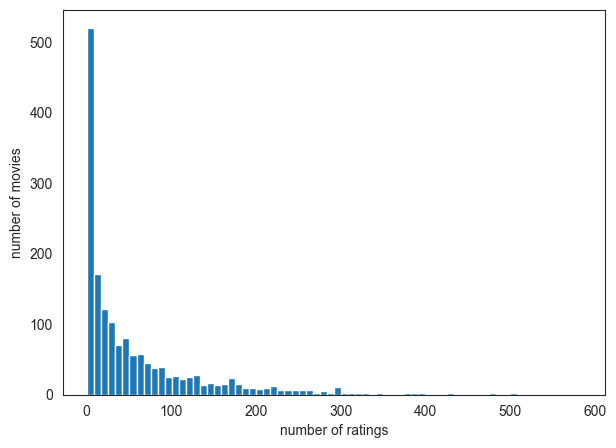

In [39]:
plt.figure(figsize = (7, 5))
plt.hist(ratings['number of ratings'], bins = 70)
plt.xlabel('number of ratings')
plt.ylabel('number of movies')
plt.show()

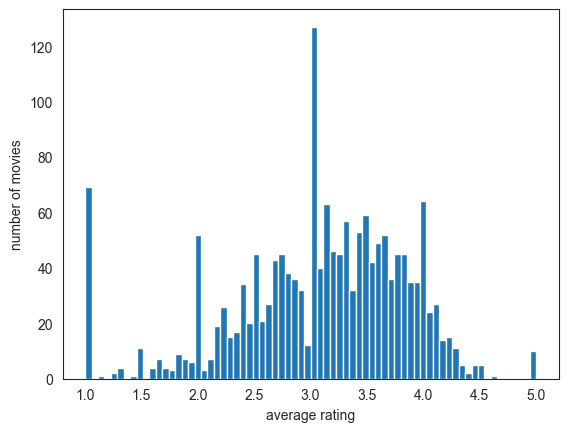

In [41]:
plt.hist(ratings['rating'], bins = 70)
plt.xlabel('average rating')
plt.ylabel('number of movies')
plt.show()

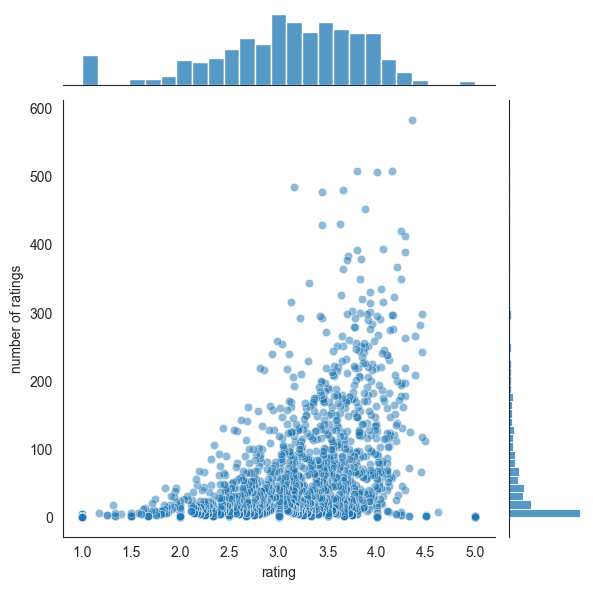

In [42]:
# Comparing average rating and number of ratings
sns.jointplot(x = 'rating', y = 'number of ratings', data = ratings, alpha = .5)
# Alpha is the opacity
plt.show()

**We can clearly see from the jointplot that as the average rating of a movie increases, the number of ratings of the movie also increases. Thus movies with high average ratings also have a large <i>number</i> of ratings.**

**Movies with very high or very low ratings are rated very few number of times.**

### **Creating movie recommendation**

In [61]:
# Creating a matrix with indices as user_id, columns as movie name and cells as user rating
movie_matrix = df.pivot_table(index = 'user_id', columns = 'title', values = "rating")
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [64]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [71]:
# Finding correlation between starwars ratings and movie_matrix
# Or the movies which have similar watch charactristics to starwars
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['correlation'])
corr_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [74]:
# Removing NaN values from above dataframe
corr_starwars.dropna(inplace = True)
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [77]:
corr_starwars.sort_values('correlation', ascending = False).head(10)

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


**From the above table, we can see that star wars seems to be perfectly correlated with multiple movies.<br><br>
This is because many movies have been rated by very few users, and those users have given similar ratings to both star wars and the other movies having a perfect correlation with star wars.<br><br>
We thus need to consider only those movies which have a significant number of ratings, say >= 100.**

In [80]:
corr_starwars = corr_starwars.join(ratings['number of ratings'])
corr_starwars.head()

,correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [85]:
# Movies with >100 ratings
corr_starwars[corr_starwars['number of ratings'] > 100]\
                .sort_values('correlation', ascending = False)

,correlation,number of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


**We can see from above that the movies which are highly correlated with star wars are actually part of the star wars series. Thus, this recommendation system is functional.**

### **Predict Function**

In [86]:
# Generalizing the above approach for any movie
def predict_movies(movie_name):
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie, columns = ['correlation'])
    corr_movie.dropna(inplace = True)
    
    corr_movie = corr_movie.join(ratings['number of ratings'])
    
    predictions = corr_movie[corr_movie['number of ratings'] > 100]\
                .sort_values('correlation', ascending = False)
    
    return predictions

In [87]:
# Put any movie name here to find movies very similar to it
predictions = predict_movies('Titanic (1997)')
predictions.head()

,correlation,number of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
